In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
import torchvision.models as torch_models
from torch import nn
os.environ['CUDA_VISIBLE_DEVICES']="3"

In [2]:
transform_test = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

In [3]:
train_dataset = datasets.CIFAR10(os.environ['DATA'], train=False, transform=transform_test, download=False)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False, num_workers=4)

In [4]:
model = torch_models.__dict__['resnet50'](weights='DEFAULT')
model.fc = nn.Identity()
model = model.cuda()

In [5]:
target_list = []
feature_list = []

for param in model.parameters():
    param.requires_grad = False
    
for inputs, targets in train_loader:
    inputs = inputs.cuda()

    features = model(inputs)
    inputs = inputs.cpu()
    features = features.cpu()

    feature_list.append(features)
    target_list.append(targets)

features_list = torch.cat(feature_list, dim=0)
target_list = torch.cat(target_list, dim=0)

In [7]:
tsne = manifold.TSNE(n_components=2, random_state=501)
X_tsne = tsne.fit_transform(features_list.numpy())

/home/2021/yujun/.tmp/ipykernel_1598161/2977128272.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[index, 0], X_tsne[index, 1], s=5, cmap=plt.cm.Spectral)


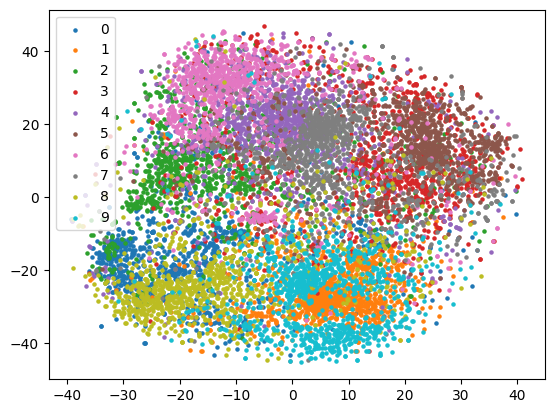

In [8]:
target_list = target_list.numpy()
for i in range(10):
    index = target_list==i
    plt.scatter(X_tsne[index, 0], X_tsne[index, 1], s=5, cmap=plt.cm.Spectral)
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.show()